In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
compAP = pd.read_csv('/Users/michaelperrine/Library/CloudStorage/OneDrive-Personal/Documents/Bellevue/Data Visualization/Week 9-10/complaints-by-airport.csv')

In [4]:
compAP.head()

,pdf_report_date,airport,year_month,count
0,2019-02,ABE,2015-01,0
1,2019-02,ABE,2015-02,0
2,2019-02,ABE,2015-03,0
3,2019-02,ABE,2015-04,0
4,2019-02,ABE,2015-05,2


In [58]:
airport_counts = compAP['airport'].value_counts()
airport_counts_top_20 = airport_counts.head(20)
airport_counts_top_20 = pd.DataFrame(airport_counts_top_20)
airport_counts_top_20.head()

,count
airport,
ABE,109
DTW,109
PHL,109
GGG,109
GJT,109


In [49]:
compAP_top_20 = compAP.sort_values(by='count', ascending = False).head(20)
compAP_top_20 = compAP_top_20.drop(columns=['airport'])
compAP_top_20

,pdf_report_date,year_month,count
41655,2021-06,2018-08-01,6604
41628,2019-12,2016-05-01,6392
41694,2024-02,2021-11-01,6368
41627,2019-12,2016-04-01,5978
41669,2022-05,2019-10-01,5897
41663,2022-05,2019-04-01,5850
41657,2021-06,2018-10-01,5842
41626,2019-12,2016-03-01,5774
41693,2024-02,2021-10-01,5741
41667,2022-05,2019-08-01,5655


In [50]:
compAP_top_20.dtypes

pdf_report_date            object
year_month         datetime64[ns]
count                       int64
dtype: object

In [5]:
compCat = pd.read_csv('/Users/michaelperrine/Library/CloudStorage/OneDrive-Personal/Documents/Bellevue/Data Visualization/Week 9-10/complaints-by-category.csv')

In [6]:
compCat.head()

,pdf_report_date,airport,category,year_month,count,clean_cat,clean_cat_status
0,2019-02,ABE,Hazardous Materials Safety,2015-01,0,Hazardous Materials Safety,original
1,2019-02,ABE,Mishandling of Passenger Property,2015-01,0,Mishandling of Passenger Property,original
2,2019-02,ABE,Hazardous Materials Safety,2015-02,0,Hazardous Materials Safety,original
3,2019-02,ABE,Mishandling of Passenger Property,2015-02,0,Mishandling of Passenger Property,original
4,2019-02,ABE,Hazardous Materials Safety,2015-03,0,Hazardous Materials Safety,original


In [7]:
compScat = pd.read_csv('/Users/michaelperrine/Library/CloudStorage/OneDrive-Personal/Documents/Bellevue/Data Visualization/Week 9-10/complaints-by-subcategory.csv')

In [8]:
compScat.head()

,pdf_report_date,airport,category,subcategory,year_month,count,clean_cat,clean_subcat,clean_cat_status,clean_subcat_status,is_category_prefix_removed
0,2019-02,ABE,Hazardous Materials Safety,General,2015-01,0,Hazardous Materials Safety,General,original,original,False
1,2019-02,ABE,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-01,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False
2,2019-02,ABE,Hazardous Materials Safety,General,2015-02,0,Hazardous Materials Safety,General,original,original,False
3,2019-02,ABE,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-02,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False
4,2019-02,ABE,Hazardous Materials Safety,General,2015-03,0,Hazardous Materials Safety,General,original,original,False


In [9]:
iata = pd.read_csv('/Users/michaelperrine/Library/CloudStorage/OneDrive-Personal/Documents/Bellevue/Data Visualization/Week 9-10/iata-icao.csv')

In [10]:
iata.head()

,country_code,region_name,iata,icao,airport,latitude,longitude
0,AE,Abu Zaby,AAN,OMAL,Al Ain International Airport,24.2617,55.6092
1,AE,Abu Zaby,AUH,OMAA,Abu Dhabi International Airport,24.4330,54.6511
2,AE,Abu Zaby,AYM,NaN,Yas Island Seaplane Base,24.4670,54.6103
3,AE,Abu Zaby,AZI,OMAD,Al Bateen Executive Airport,24.4283,54.4581
4,AE,Abu Zaby,DHF,OMAM,Al Dhafra Air Base,24.2482,54.5477


In [11]:
print(f'The dimensions of compAP is: {compAP.shape}')
print(f'The dimesions of compCat is: {compCat.shape}')
print(f'The dimesions of compScat is: {compScat.shape}')
print(f'The dimesions of iata is: {iata.shape}')

The dimensions of compAP is: (41721, 4)
The dimesions of compCat is: (241588, 7)
The dimesions of compScat is: (504512, 11)
The dimesions of iata is: (8937, 7)


In [12]:
compAP.columns

Index(['pdf_report_date', 'airport', 'year_month', 'count'], dtype='object')

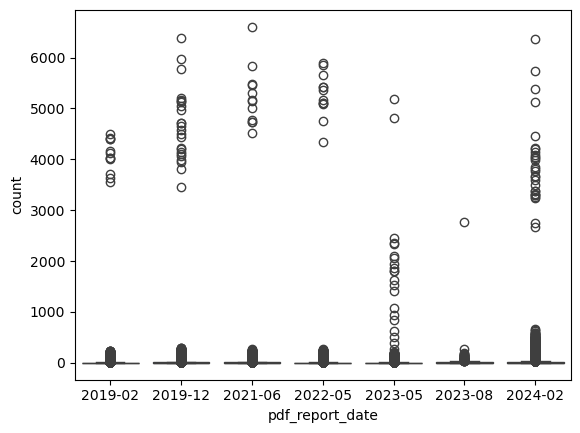

In [13]:
sns.boxplot(data=compAP, x = 'pdf_report_date', y = 'count')
plt.show()

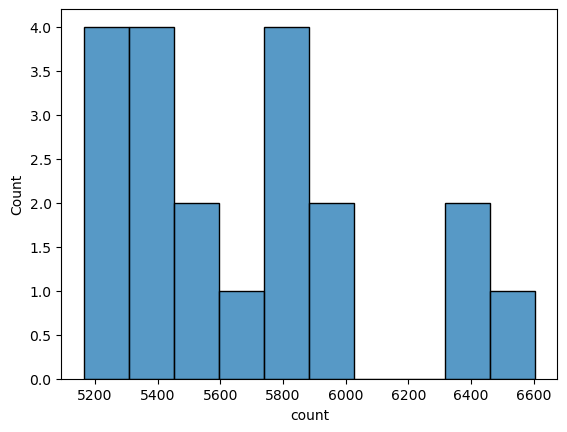

In [53]:
sns.histplot(data = compAP_top_20, x = 'count', bins = 10)
plt.show()